Multi-armed badit에서 여러 정책의 성능
- 초기탐험-후기탐사 
- $\epsilon$-greedy
- UCB

Q. $\epsilon = 0$일 때 $\epsilon$-greedy의 성능이 너무 높게 나타남. rate = 0인 경우의 초기탐험-후기탐사 정책과 동일해야 함  
A. visit 배열의 초기값을 1 대신 0으로 바꾸면 제대로 나옴

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def simulate_pull_bandit(handle, visit, win): # Simulate pulling the bandit arm
    visit[handle] += 1 # Increment the number of visits for the selected arm
    win[handle] += 1 if np.random.random() < arm_prob[handle] else 0 # Increment the number of wins for the selected arm
    

[0.5290373145382821, 0.221676733461396, 0.4523980774227457, 0.29712703539268825, 0.21857738014512368, 0.43324255597861744, 0.5993610365515846, 0.22649500460754718, 0.3923017515779923, 0.41289915100406666, 0.1862800310477567, 0.49860059247062155, 0.15747071121916567, 0.5181818525767923, 0.4556221137621945, 0.611947897418538, 0.2679739634373125, 0.6092587678002324, 0.5282910514730795, 0.22389992628647715]
Exploration and Exploitation: [-190.72   -6.36   30.2   -19.24 -124.24 -213.52 -226.56]


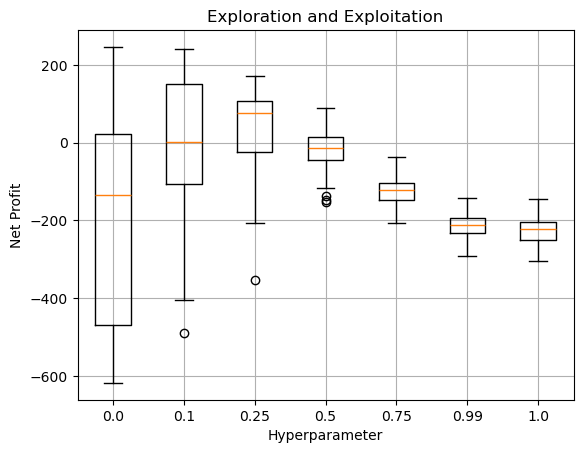

Epsilon-Greedy: [-176.92  104.6    96.96   48.84   18.04  -30.64  -64.32  -92.04 -147.88
 -174.8  -207.32]


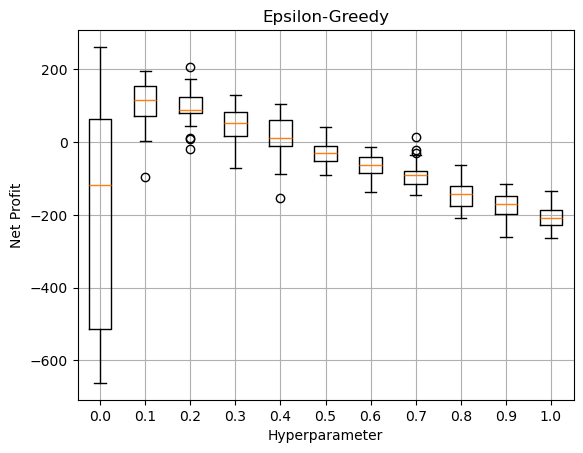

UCB: [ 159.96  186.56  180.6   164.52  170.4   178.56   -9.   -165.6 ]


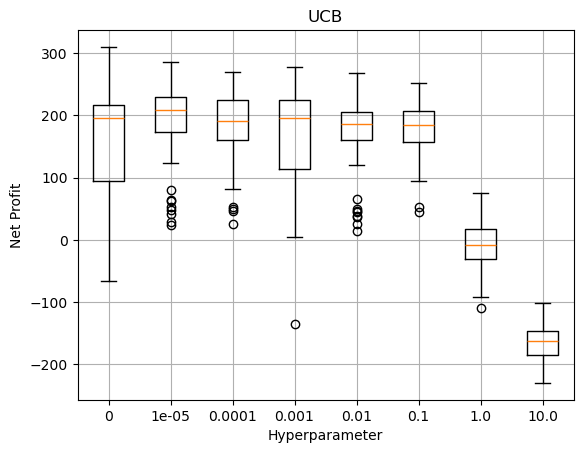

In [23]:
def exploration_and_exploitation(rate):
    #visit = np.ones(num_arms)
    #win = np.ones(num_arms)
    visit = np.zeros(num_arms)
    win = np.zeros(num_arms)
    for t in range(int(num_pulls * rate)):
        handle = np.random.randint(num_arms)
        simulate_pull_bandit(handle, visit, win)
    p = np.array([win[i]/visit[i] if visit[i] > 0 else 0 for i in range(num_arms)])
    h = np.random.choice(np.where(p==np.max(p))[0])
    for t in range(num_pulls - int(num_pulls * rate)):
        simulate_pull_bandit(h, visit, win)
    return visit, win

def epsilon_greedy(epsilon):
    #visit = np.ones(num_arms)
    #win = np.ones(num_arms)
    visit = np.zeros(num_arms)
    win = np.zeros(num_arms)
    for t in range(num_pulls):
        if np.random.random() < epsilon:
            h = np.random.randint(0,num_arms)
        else:
            #p = np.array([win[i]/visit[i] for i in range(num_arms)])
            p = np.array([win[i] / visit[i] if visit[i] > 0 else 0 for i in range(num_arms)])
            h = np.random.choice(np.where(p==np.max(p))[0])
        simulate_pull_bandit(h, visit, win)
    return visit, win

def UCB(c):
    visit = np.ones(num_arms)
    win = np.ones(num_arms)
    for t in range(num_pulls):
        p = np.array([win[i]/visit[i] + c * np.sqrt(np.log(t+1)/visit[i]) for i in range(num_arms)])
        h = np.random.choice(np.where(p==np.max(p))[0])
        simulate_pull_bandit(h, visit, win)
    return visit, win

def box_plot_analysis(algorithm, hyper_param, alg_name):
    net_profit = []
    for param in hyper_param:
        net = []
        for k in range(num_runs):
            visit, win = algorithm(param)
            net.append(sum([2*win[i]-visit[i] for i in range(num_arms)]))
        net_profit.append(net)
    print(alg_name+':',np.mean(net_profit, axis=1))

    plt.boxplot(net_profit)
    plt.title(alg_name)
    plt.xlabel('Hyperparameter')
    plt.ylabel('Net Profit')
    plt.grid()
    plt.xticks(ticks=range(1, len(hyper_param)+1), labels=hyper_param)
    plt.show()

num_arms = 20
arm_prob = [0.4+(np.random.random()-0.5)/2 for i in range(num_arms)] # uniform over [0.15, 0.65]
num_pulls = 1000
num_runs = 50

print(arm_prob)
box_plot_analysis(exploration_and_exploitation, [0.0,0.1,0.25,0.5,0.75,0.99,1.0], 'Exploration and Exploitation')
box_plot_analysis(epsilon_greedy, [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], 'Epsilon-Greedy')
box_plot_analysis(UCB, [0,0.00001,0.0001,0.001,0.01,0.1,1.0,10.0], 'UCB')


